### Generative Models

1.   Generative models are a class of machine learning models designed to learn and understand the underlying structure of the      data they are trained on, with the ultimate goal of generating new data samples that are similar to the training data.          These models are particularly useful for tasks such as image generation, text generation, and even music composition.

Generative models aim to learn the probability distribution of the training data. This means they try to understand what makes the data samples similar to each other and what makes them different. By capturing these patterns, the model can generate new samples that resemble the training data. **LDA, NN and some time series models are generative.**

Examples:
Image generation: Generative models can be used to create realistic images, such as generating new human faces or              creating artwork.

Text generation: These models can generate text in various styles or even continue a given piece of text.
              
Data augmentation: Generative models can be used to augment datasets by generating additional realistic data                   samples, which can improve the performance of machine learning models trained on limited data.
              
Anomaly detection: By learning the normal distribution of the data, generative models can identify anomalies or                 outliers that deviate significantly from the learned distribution.
              
**Generative models capture the joint probability $p(X, Y)$, or just $p(X)$ if there are no labels.**
     
2.   Discriminative models are a class of machine learning models that focus on learning the boundary or decision boundary          between different classes in the input data. Unlike generative models that model the underlying distribution of the data,      discriminant models directly learn the mapping from input features to class labels.

LR, SVM are some models. LDA and NN can also be considered discriminative when focusing on generating decision boundaries. 

Discriminative models capture the conditional probability $p(Y | X)$.

-----------------------------------------------------------------------------------------------------------------------------
Modeling the **joint distribution** $p(x,y)$ giving rise to the data

$$
(x_1,y_1),\ldots,(x_n,y_n).
$$

Regression and classification require only modeling the **conditional distribution** $p(y\mid x)$, since our goal is to predict $y$ from $x$.

Sometimes, though, modeling the joint distribution is fairly natural and extremely useful.

In particular, modeling $p(x,y)$ allows us to sample (generate) new data points $(x,y)$. This facilitates machine learning models that create, not just predict!


LDA, QDA, Naive Bayes classifier are called the Bayes classifier, owing to the use of the Bayes rule in its derivation.

## Linear Discriminant Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.discrete.discrete_model as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import preprocessing

In [3]:
#https://rdrr.io/cran/ISLR/man/Smarket.html
Smarket = pd.read_csv('Smarket1.csv', header=0)
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [130]:
Smarket_2005 = Smarket.query('Year >= 2005')
Smarket_train = Smarket.query('Year < 2005')

In [131]:
Smarket_train

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
...,...,...,...,...,...,...,...,...,...
993,2004,0.046,0.342,0.904,0.038,-0.749,0.9561,-0.431,Down
994,2004,-0.431,0.046,0.342,0.904,0.038,0.9220,0.715,Up
995,2004,0.715,-0.431,0.046,0.342,0.904,0.9830,-0.007,Down
996,2004,-0.007,0.715,-0.431,0.046,0.342,0.9259,0.008,Up


In [132]:
X_train = Smarket_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]
y_train = pd.get_dummies(Smarket_train[['Direction']], dtype=int)

X_test = Smarket_2005[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]
y_test = pd.get_dummies(Smarket_2005[['Direction']], dtype=int)

X_train

,Lag1,Lag2,Lag3,Lag4,Lag5
0,0.381,-0.192,-2.624,-1.055,5.010
1,0.959,0.381,-0.192,-2.624,-1.055
2,1.032,0.959,0.381,-0.192,-2.624
3,-0.623,1.032,0.959,0.381,-0.192
4,0.614,-0.623,1.032,0.959,0.381
...,...,...,...,...,...
993,0.046,0.342,0.904,0.038,-0.749
994,-0.431,0.046,0.342,0.904,0.038
995,0.715,-0.431,0.046,0.342,0.904
996,-0.007,0.715,-0.431,0.046,0.342


In [133]:
y_train

,Direction_Down,Direction_Up
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
993,1,0
994,0,1
995,1,0
996,0,1


In [134]:
# the training process
sklearn_lda = LDA(n_components=1) #creating a LDA object, the number of linear discriminants that we want to retrieve
lda = sklearn_lda.fit(X_train, y_train.iloc[:,1]) #learning the projection matrix
X_lda = lda.transform(X_train) #using the model to project X
X_labels = lda.predict(X_train) #gives you the predicted label for each sample
X_prob = lda.predict_proba(X_train) #the probability of each sample to belong to each class

In [135]:
# testing step
X_test_labels =lda.predict(X_test)
X_test_prob = lda.predict_proba(X_test)
print(X_test_prob[0:5,:])

[[0.48831053 0.51168947]
 [0.47980926 0.52019074]
 [0.46716317 0.53283683]
 [0.47616853 0.52383147]
 [0.49701005 0.50298995]]


In [136]:
# get the accuracy of the test set using default threshold
np.mean(y_test.iloc[:,1]==X_test_labels)

0.5873015873015873

In [137]:
# let's change the threshod a bit to see whether we can improve the accuracy.
# the 2nd column of X_test_prob is the probability belongs to UP group.
# the default value is 0.5
threshold = 0.52
np.mean(y_test.iloc[:,1]==(X_test_prob[:,1]>=threshold))

0.4603174603174603

In [138]:
threshold = 0.48
np.mean(y_test.iloc[:,1]==(X_test_prob[:,1]>=threshold))

0.5634920634920635

##  Quadratic Discriminant Analysis

In [139]:
sklearn_qda = QDA(priors=None,store_covariance=True) #creating a QDA object
qda = sklearn_qda.fit(X_train, y_train.iloc[:,1]) #learning the projection matrix
X_labels = qda.predict(X_train) #gives you the predicted label for each sample
X_prob = qda.predict_proba(X_train) #the probability of each sample to belong to each class

X_test_labels=qda.predict(X_test)
X_test_prob = qda.predict_proba(X_test)

print(np.mean(y_test.iloc[:,1]==X_test_labels) )


0.5674603174603174


In [140]:
print(qda.means_)
print(qda.covariance_)

[[ 0.04279022  0.03389409 -0.00980652 -0.01059878  0.0043666 ]
 [-0.03954635 -0.03132544  0.00583432  0.00311045 -0.00065089]]
[array([[ 1.50662277, -0.03924806, -0.1161981 ,  0.02773081,  0.10375151],
       [-0.03924806,  1.53559498, -0.05837697,  0.00911436,  0.00535896],
       [-0.1161981 , -0.05837697,  1.5261648 ,  0.02759497, -0.0866616 ],
       [ 0.02773081,  0.00911436,  0.02759497,  1.60391547, -0.08697959],
       [ 0.10375151,  0.00535896, -0.0866616 , -0.08697959,  1.44963901]]), array([[ 1.51700576, -0.02787349,  0.08140326, -0.03328334, -0.11218792],
       [-0.02787349,  1.49026815, -0.00519942, -0.03974989, -0.01424049],
       [ 0.08140326, -0.00519942,  1.51497806, -0.08359669,  0.02661005],
       [-0.03328334, -0.03974989, -0.08359669,  1.44088396,  0.0176842 ],
       [-0.11218792, -0.01424049,  0.02661005,  0.0176842 ,  1.63961971]])]


##  Naive Bayes

In [141]:
NB_class = NB()
NB_class.fit(X_train, y_train.iloc[:,1])
X_test_labels=NB_class.predict(X_test)
X_test_prob = NB_class.predict_proba(X_test)
print(np.mean(y_test.iloc[:,1]==X_test_labels))


0.5793650793650794


### Bayes classifier for the Breast Cancer Wisconsin dataset

In [142]:
from sklearn.datasets import load_breast_cancer
p = 5
bunch = load_breast_cancer()


In [143]:
type(bunch)

sklearn.utils._bunch.Bunch

In [144]:
type(bunch.data)

numpy.ndarray

In [145]:
bunch.data.shape

(569, 30)

In [146]:
bunch.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [147]:
X = bunch.data[:,:5]
y = bunch.target
features = bunch.feature_names[:p]
targets = bunch.target_names
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)
print(X.shape)

(569, 5)


In [148]:
print(len(X), features, targets)

569 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness'] ['malignant' 'benign']


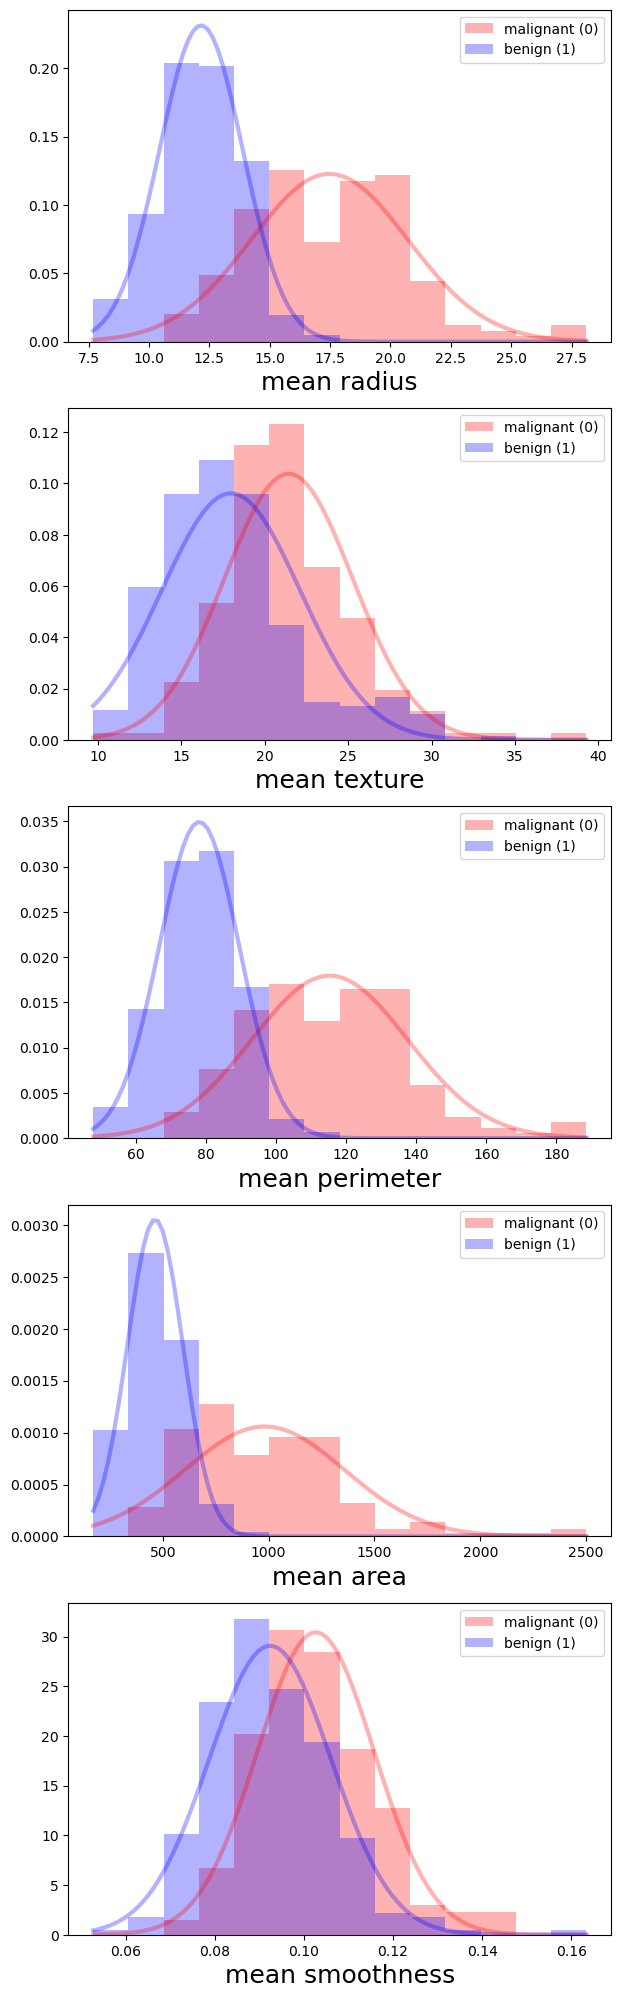

In [149]:
from scipy.stats import norm

fig, axes = plt.subplots(p, 1, figsize=(7,5*p))
for j in range(p):
    bins = np.linspace(X_tr[:,j].min(), X_tr[:,j].max(), 15)
    axes[j].hist(X_tr[y_tr == 0, j], bins=bins, density=True, color=(1,0,0,0.3), label=f"{targets[0]} (0)")
    axes[j].hist(X_tr[y_tr == 1, j], bins=bins, density=True, color=(0,0,1,0.3), label=f"{targets[1]} (1)")

    params_0 = norm.fit(X_tr[y_tr == 0, j])
    params_1 = norm.fit(X_tr[y_tr == 1, j])
    dist_0 = norm(*params_0)
    dist_1 = norm(*params_1)
    t = np.linspace(X_tr[:,j].min(), X_tr[:,j].max(), 100)
    axes[j].plot(t, dist_0.pdf(t), color=(1,0,0,0.3), lw=3)
    axes[j].plot(t, dist_1.pdf(t), color=(0,0,1,0.3), lw=3)

    axes[j].set_xlabel(features[j], fontsize=18)
    axes[j].legend()

The marginals look reasonably Gaussian, so let's try modeling the class-conditional distributions by 5-dimensional Gaussians.

In [150]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_tr, y_tr)
acc_te = accuracy_score(y_te, model.predict(X_te))
print(acc_te)

0.8859649122807017


Gaussian Bayes Classifier assume the features follow multivariate normal distribution.
The following code help to build you own Gaussian Bayes Classifier

In [151]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from scipy.stats import multivariate_normal

class GaussianBayesClassifier(BaseEstimator, ClassifierMixin):

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = unique_labels(y)
        self.priors_ = [np.mean(y == c) for c in self.classes_]
        self.means_ = [np.mean(X[y == c], axis=0) for c in self.classes_]
        self.covs_ = [np.cov(X[y == c], rowvar=False) for c in self.classes_]
        self.n_features_in_ = X.shape[1]
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        posteriors = np.zeros((len(X), len(self.classes_)))
        for j, (prior, mean, cov) in enumerate(zip(self.priors_, self.means_, self.covs_)):
          mvn = multivariate_normal(mean=mean, cov=cov)
          posteriors[:, j] = mvn.pdf(X)*prior
        y_pred = self.classes_[posteriors.argmax(axis=1)]
        return y_pred

In addition to NB, try using LDA and QDA for this data set to see which model would be a good fit. 